Here I intend to implement a Hopfield model for fun. Hector Sainvet, April 2022.

In [1]:
import numpy as np

from matplotlib import pyplot as plt, animation
import multiprocessing as mp

In [2]:
# Parameters

In [3]:
N = 20
size = N **2

In [4]:
temp = 0.1
p_type ="random"

In [5]:

p = 80
corr = 0.20

In [6]:
dyn = "Glauber"

In [7]:
# Test


In [8]:
pattern1 = np.array([-1,1]*(size//2)) # vertical

pattern2 = np.array([-1]*20 + [1]*20)*(N//2)

In [9]:
pattern3 = np.array([[-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.],
       [-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.],
       [-1., -1., -1., -1., -1., -1., -1., -1., -1., 1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.],
       [-1., -1., -1., -1., -1., -1., -1., -1., 1., -1., 1., -1., -1., -1., -1., -1., -1., -1., -1., -1.],
       [-1., -1., -1., -1., -1., -1., -1., 1., -1., -1., -1., 1., -1., -1., -1., -1., -1., -1., -1., -1.],
       [-1., -1., -1., -1., -1., -1., -1., 1., -1., -1., -1., 1., -1., -1., -1., -1., -1., -1., -1., -1.],
       [-1., -1., -1., -1., -1., -1., -1., 1., -1., -1., -1., 1., -1., -1., -1., -1., -1., -1., -1., -1.],
       [-1., -1., -1., -1., -1., -1., -1., 1., -1., -1., -1., 1., -1., -1., -1., -1., -1., -1., -1., -1.],
       [-1., -1., -1., -1., -1., -1., -1., 1., -1., -1., -1., 1., -1., -1., -1., -1., -1., -1., -1., -1.],
       [-1., -1., -1., -1., -1., -1., -1., 1., 1., 1., 1., 1., -1., -1., -1., -1., -1., -1., -1., -1.],
       [-1., -1., -1., -1., -1., -1., -1., 1., -1., -1., -1., 1., -1., -1., -1., -1., -1., -1., -1., -1.],
       [-1., -1., -1., -1., -1., -1., -1., 1., -1., -1., -1., 1., -1., -1., -1., -1., -1., -1., -1., -1.],
       [-1., -1., -1., -1., -1., -1., -1., 1., -1., -1., -1., 1., -1., -1., -1., -1., -1., -1., -1., -1.],
       [-1., -1., -1., -1., -1., -1., -1., 1., -1., -1., -1., 1., -1., -1., -1., -1., -1., -1., -1., -1.],
       [-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.],
       [-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.],
       [-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.],
       [-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.],
       [-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.],
       [-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.]]).flatten()

In [10]:
patterns = [pattern1, pattern2, pattern3] if p_type == "test" else [np.random.choice([-1,1], size = size) for i in range(p)]

nproc = 8
pool = mp.Pool(nproc)


In [11]:
def set_temperature(newtemp = 0):
    global temp
    temp = newtemp
    
def get_current_temperature():
    return temp

def generate_random_spins(N):
    return np.random.choice([-1,1], size =(N,))

def generate_weights(patterns):
    return sum([np.outer(p, p) - np.identity(size) for p in patterns])/size

In [12]:
def delta_H(i,J):
    return 2*np.matmul(J, spins)[i]*spins[i]

In [13]:
def corrupt_pattern(pat, frac = 0.2):
    return np.array([item if np.random.random() > frac else -item for item in pat])

In [14]:
def parallel_metropolis(T):
    global spins
    def single_evolve(idx):
        global temp
        T = temp
        dE = delta_H(idx, J)
        if dE < 0 or np.random.random() < np.exp(-dE/T):
            spins[idx] *=1
            
    indices = np.random.choice(a=range(size),size = nproc, replace = False)
    
    print("T = ", get_current_tmperature(), ", ", "\u0381", " = ", len(patterns)/size, ", init pattern : ", loaded, ", Nominal fraction of corrupted bits = ", corr)
    for spin in indices:
        pool.apply_async(single_evolve(spin), indices)

In [15]:
def parallel_glauber(T):
    global spins
    def single_evolve(idx):
        global temps
        T = temp
        dE = delta_H(idx, J)
        if np.random.random() < (1 + np.exp(dE/T))**(-1):
            spins[idx] *=1
            
    indices  = np.random.choice(a  = range(size), size = nproc , replace = False)
    print("T = ", get_current_temperature(),", ", "\u03B1", " = ", len(patterns)/size, ", init pattern : " ,loaded, ", Nominal fraction of corrupted bits = ", corr)
    print(indices)
    for spin in indices:    
        pool.apply_async(single_evolve(spin))

In [16]:
def ev_step(T):
    global spins
    idx = np.random.randint(0, size)
    dE = delta_H(idx, J)
    print("T = ", get_current_temperature(),", ", "\u03B1", " = ", len(patterns)/size, ", init pattern : " ,loaded, ", Nominal fraction of corrupted bits = ", corr)
    if dE < 0 or np.random.random() < np.exp(-dE/T):
        spins[idx] *= -1

In [17]:
def overlap(n):
    return np.dot(patterns[n], spins)/size

# Run

In [18]:
patterns

[array([-1,  1,  1, -1, -1, -1,  1, -1,  1, -1, -1,  1, -1,  1,  1, -1,  1,
         1,  1, -1,  1,  1,  1, -1, -1,  1, -1,  1, -1,  1,  1, -1, -1,  1,
         1,  1, -1, -1, -1,  1,  1,  1, -1, -1, -1,  1,  1,  1, -1,  1,  1,
        -1,  1, -1, -1, -1, -1, -1, -1,  1,  1, -1,  1,  1,  1, -1,  1, -1,
         1, -1,  1, -1, -1,  1,  1, -1,  1,  1,  1, -1, -1,  1,  1,  1, -1,
         1, -1,  1, -1,  1,  1, -1,  1, -1, -1,  1, -1,  1, -1, -1, -1,  1,
        -1, -1, -1, -1,  1, -1, -1, -1,  1, -1,  1, -1,  1,  1,  1, -1, -1,
        -1, -1, -1, -1,  1, -1,  1, -1,  1,  1, -1,  1, -1,  1,  1, -1,  1,
         1,  1, -1,  1,  1,  1,  1, -1, -1,  1, -1, -1,  1, -1,  1, -1,  1,
         1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1, -1, -1, -1, -1,  1,  1,
         1, -1, -1,  1, -1, -1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1, -1,
        -1, -1,  1,  1, -1,  1,  1,  1,  1, -1,  1, -1,  1, -1,  1,  1,  1,
        -1, -1,  1, -1, -1, -1, -1,  1,  1, -1, -1,  1, -1, -1, -1,  1, -1,
        -1, 

In [19]:
J = generate_weights(patterns)

In [20]:
len(patterns)

80

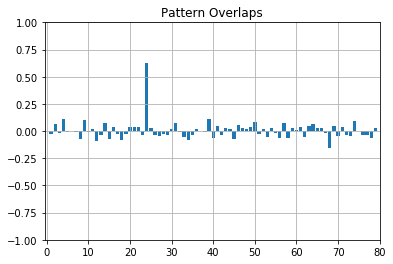

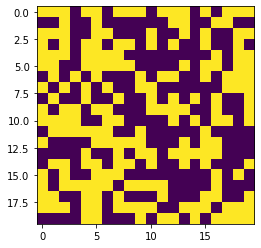

In [21]:
loaded = np.random.choice(len(patterns))

spins = corrupt_pattern(patterns[loaded], corr)

init_overlaps = [overlap(n) for n in range(len(patterns))]

fig_overlap, ax_overlap = plt.subplots()
ax_overlap.set_title('Pattern Overlaps')
bars = ax_overlap.bar([i for i in range(len(patterns))], [overlap(i) for i in range(len(patterns))])
ax_overlap.set_ylim([-1,1])
ax_overlap.set_xlim([-0.5 ,len(patterns)])
ax_overlap.grid(True)

fig1, ax1 = plt.subplots()
im1 = plt.imshow(spins.reshape(N,N))

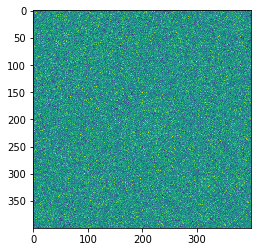

In [22]:
plt.imshow(J)

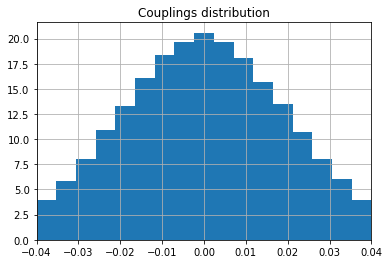

In [23]:
fig2, ax2 = plt.subplots()
weight_distribution = ax2.hist(J.flatten(), bins = np.linspace(-0.04, 0.04, 18), density = True)
ax2.set_title('Couplings distribution')
ax2.set_xlim([-0.04,0.04])
ax2.grid(True)
plt.show()

In [24]:
def update_overlap(dummy):
    global fig_overlap, ax_overlap
    for bar, ovlp in zip(bars, [overlap(i) for i in range(len(patterns))]):
        bar.set_height(ovlp)
    return [fig_overlap]

In [25]:
def update_network(t):
    global spins, temp
    if dyn == "Glauber":
        parallel_glauber(temp)
    elif dyn == "Metropolis":
        parallel_metropolis(temp)
    im1.set_array(spins.reshape(N,N))
    print(im1)
    return[im1]

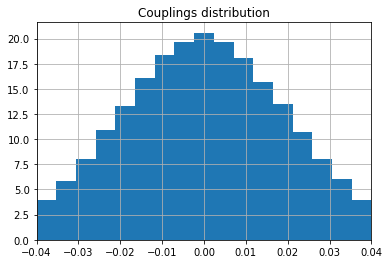

In [27]:
anim_spins = animation.FuncAnimation(fig1, update_network, interval=20)
anim_overlap = animation.FuncAnimation(fig_overlap, update_overlap)

fig2, ax2 = plt.subplots()
weight_distribution = ax2.hist(J.flatten(), bins = np.linspace(-0.04, 0.04, 18), density = True)
ax2.set_title('Couplings distribution')
ax2.set_xlim([-0.04,0.04])
ax2.grid(True)
plt.show()